In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [118]:
import pandas as pd
df=pd.read_csv('/content/Housing.csv')

In [119]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [120]:
df=df.drop_duplicates()

<Axes: >

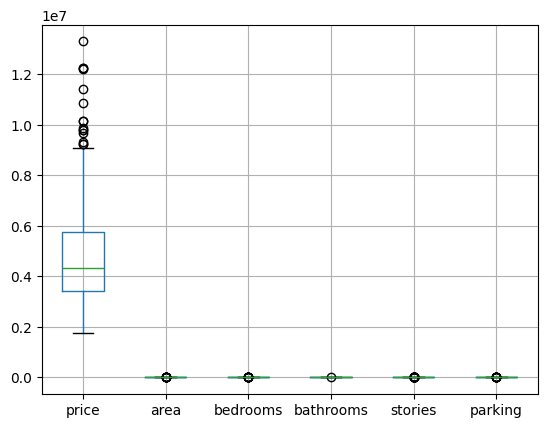

In [121]:
df.boxplot()

In [122]:
Q1=df['price'].quantile(0.25)
Q3=df['price'].quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
df=df[(df['price']>=lower)&(df['price']<=upper)]

In [123]:
'''import numpy as np
df['price']=np.log1p(df['price'])
df['area']=np.log1p(df['area'])'''

"import numpy as np\ndf['price']=np.log1p(df['price'])\ndf['area']=np.log1p(df['area'])"

In [124]:
Q1=df['area'].quantile(0.25)
Q3=df['area'].quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
df=df[(df['area']>=lower)&(df['area']<=upper)]

<Axes: >

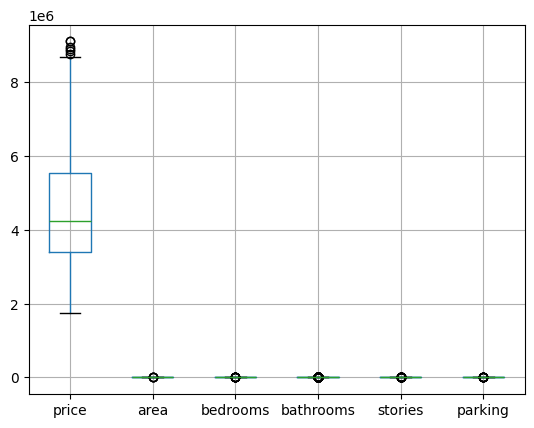

In [125]:
df.boxplot()

In [126]:

df=pd.get_dummies(df,columns=['furnishingstatus'],drop_first=True).replace({True:1,False:0})



<ipython-input-126-1518ed48a9de>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df=pd.get_dummies(df,columns=['furnishingstatus'],drop_first=True).replace({True:1,False:0})


In [127]:
binary=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
def enc (df,binary):
  for col in binary:
    df[col]=df[col].replace({'yes':1,'no':0})
  return df
encod=enc (df,binary)

<ipython-input-127-00501f376cd8>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col]=df[col].replace({'yes':1,'no':0})


In [128]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
S=scaler.fit_transform(df)

In [129]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars = ['area','price']

df[num_vars] = scaler.fit_transform(df[num_vars])

In [130]:
X = df.drop("price", axis=1)
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [131]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [132]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score


In [133]:
models=[LinearRegression(),RandomForestRegressor(n_estimators=100,max_depth=10,random_state=42),DecisionTreeRegressor(max_depth=None)]

In [134]:
def list_model (models):
  for model in models:
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    mse=mean_squared_error(y_test,y_pred)
    r2=r2_score(y_test,y_pred)
    print(model)
    print('mse  =',mse,'r2   =',r2)
    print('____________________')
list_model (models)

LinearRegression()
mse  = 0.017662524771732045 r2   = 0.674767344781106
____________________
RandomForestRegressor(max_depth=10, random_state=42)
mse  = 0.01950114712559737 r2   = 0.6409114811477556
____________________
DecisionTreeRegressor()
mse  = 0.035239914617128915 r2   = 0.3511023396293287
____________________
